# Athlete Analysis – Will Clayton

### import libraries

In [39]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import importlib
import matplotlib.dates as mdates

### read the data

In [27]:
file_path = r'C:\Users\leopo\OneDrive\Documents\coding\projects\tfrrs_scraper\data\2015_to_2024'


data = pd.read_feather(file_path)

### view a sample of the data

In [28]:
pd.set_option('display.max_columns', None)
data.head(3)

,athlete_name,last_name,first_name,athlete_id,year_when_scraped,school,school_scraped_url,division,region,main_conference,other_conferences_found,gender,transfers,has_transferred,meet_name,meet_date,events_competed_in_meet,event,n_event_of_meet,performance,place,event_stage,wind,meet_type,scraped_for_school,athlete_url,year_scraped_roster,year_scraped_season,year_scraped_year,school_roster_size,parsed_date,converted_performance,granular_performance,school_state
0,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,SP,1,11.74m,9th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:11.740000,11.74,MD
1,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,DT,2,34.52m,16th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:34.520000,34.52,MD
2,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,HT,3,49.65m,5th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:49.650000,49.65,MD


### get only Will Clayton's data

In [29]:
will_clayton_data = data[
    (data['athlete_name'] == 'WILL CLAYTON') &
    (data['school'] == 'CHRISTIAN BROS.')
]

### view a sample of Will Clayton's data

In [36]:
will_clayton_data.head(3)

,athlete_name,last_name,first_name,athlete_id,year_when_scraped,school,school_scraped_url,division,region,main_conference,other_conferences_found,gender,transfers,has_transferred,meet_name,meet_date,events_competed_in_meet,event,n_event_of_meet,performance,place,event_stage,wind,meet_type,scraped_for_school,athlete_url,year_scraped_roster,year_scraped_season,year_scraped_year,school_roster_size,parsed_date,converted_performance,granular_performance,school_state
17350210,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,2024 Gulf South Conference Outdoor Championship,"May 2- 4, 2024",2,5000,1,15:42.13,16th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-05-02,0 days 00:15:42.130000,942.13,TN
17350211,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,2024 Gulf South Conference Outdoor Championship,"May 2- 4, 2024",2,3000S,2,9:43.31,7th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-05-02,0 days 00:09:43.310000,583.31,TN
17350212,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,Memphis Tiger Invitational,"Apr 26-27, 2024",1,1500,1,4:13.60,15th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-04-26,0 days 00:04:13.600000,253.60,TN


### get a quick summary of Will Clayton

In [35]:
import athlete_overview as ao #import the athlete overview module

importlib.reload(ao)    #reload the modele to ensure it has the latest changes

ao.summarize_athlete(data, 'WILL CLAYTON')

name: WILL CLAYTON
first race: 2019-09-07 00:00:00
last race: 2024-05-02 00:00:00
school: CHRISTIAN BROS.
conference: Gulf South
region: South Region
division: DII
unique events:['5000' '3000S' '1500' '3000' '9.8k' '8k' '6k' '4M' '10k' '2000S' 'DMR'
 'Mile']


### look at Will Clayton's development for each event over his college career

C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\3109066374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\3109066374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year


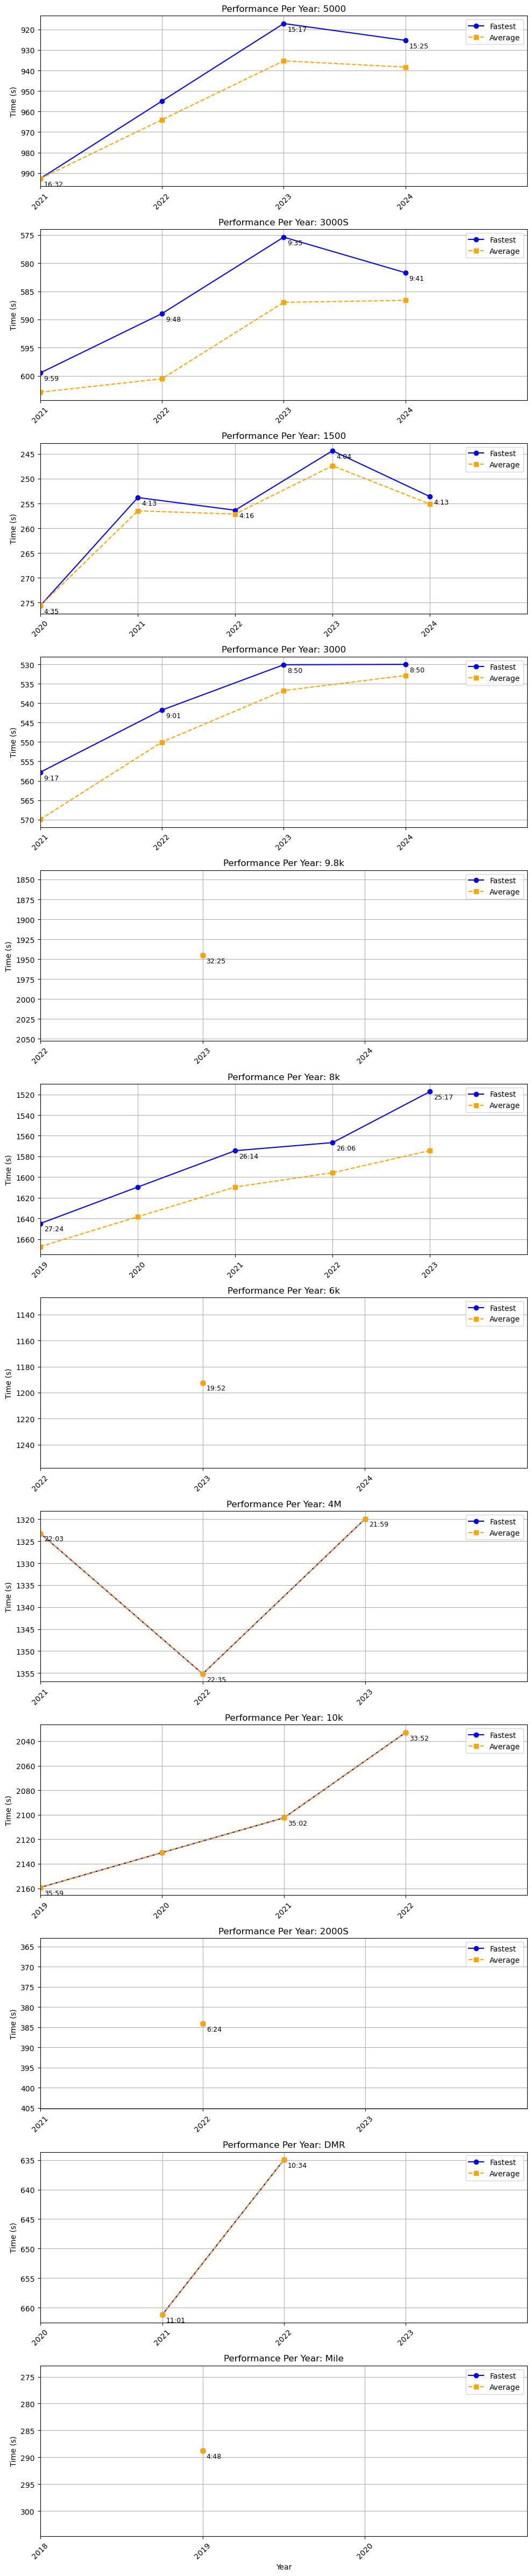

In [76]:
# Ensure 'parsed_date' is datetime and extract year
will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year

events = will_clayton_data['event'].unique()
num_events = len(events)

fig, axes = plt.subplots(num_events, 1, figsize=(10, 4 * num_events))
if num_events == 1:
    axes = [axes]

for ax, event in zip(axes, events):
    df_event = will_clayton_data[will_clayton_data['event'] == event].copy()

    min_year = df_event['year'].min()
    max_year = df_event['year'].max()
    event_years = pd.Series(range(min_year, max_year + 1))

    # Group by year and compute fastest and average
    df_summary = (
        df_event.groupby('year', as_index=False)
        .agg({
            'granular_performance': ['min', 'mean']
        })
    )
    df_summary.columns = ['year', 'fastest', 'average']

    # Reindex to full year range and interpolate missing values
    df_summary = df_summary.set_index('year').reindex(event_years)
    df_summary['fastest'] = df_summary['fastest'].interpolate(method='linear')
    df_summary['average'] = df_summary['average'].interpolate(method='linear')
    df_summary['year_date'] = pd.to_datetime(df_summary.index, format='%Y')

    # Track which years had actual data (for annotation)
    df_summary['has_data'] = df_summary.index.isin(df_event['year'].unique())

    # Format fastest time as mm:ss
    def format_mmss(seconds):
        if pd.isna(seconds):
            return ""
        minutes = int(seconds // 60)
        secs = int(seconds % 60)
        return f"{minutes}:{secs:02d}"

    df_summary['mmss'] = df_summary['fastest'].apply(format_mmss)

    # Plot fastest and average
    ax.plot(df_summary['year_date'], df_summary['fastest'], marker='o', label='Fastest', color='blue')
    ax.plot(df_summary['year_date'], df_summary['average'], marker='s', label='Average', color='orange', linestyle='--')

    ax.set_title(f'Performance Per Year: {event}')
    ax.set_ylabel('Time (s)')
    ax.invert_yaxis()
    ax.grid(True)

    # Annotate fastest with mm:ss only for actual data points
    for i, row in df_summary.iterrows():
        if row['has_data'] and pd.notna(row['fastest']):
            ax.annotate(row['mmss'], (row['year_date'], row['fastest']),
                        textcoords="offset points", xytext=(5, -10), ha='left', fontsize=9)

    # Format x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', rotation=45)

    # Smart x-axis padding
    if len(event_years) == 1:
        center_year = event_years.iloc[0]
        ax.set_xlim(pd.Timestamp(f'{center_year - 1}-01-01'), pd.Timestamp(f'{center_year + 1}-12-31'))
    elif len(event_years) == 2:
        left = event_years.iloc[0] - 1
        right = event_years.iloc[1] + 1
        ax.set_xlim(pd.Timestamp(f'{left}-01-01'), pd.Timestamp(f'{right}-12-31'))
    else:
        ax.set_xlim(pd.Timestamp(f'{min_year}-01-01'), pd.Timestamp(f'{max_year}-12-31'))

    ax.legend()

axes[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()

### look at Will Clayton's 8k performances within each season

C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\1071128731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\1071128731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year


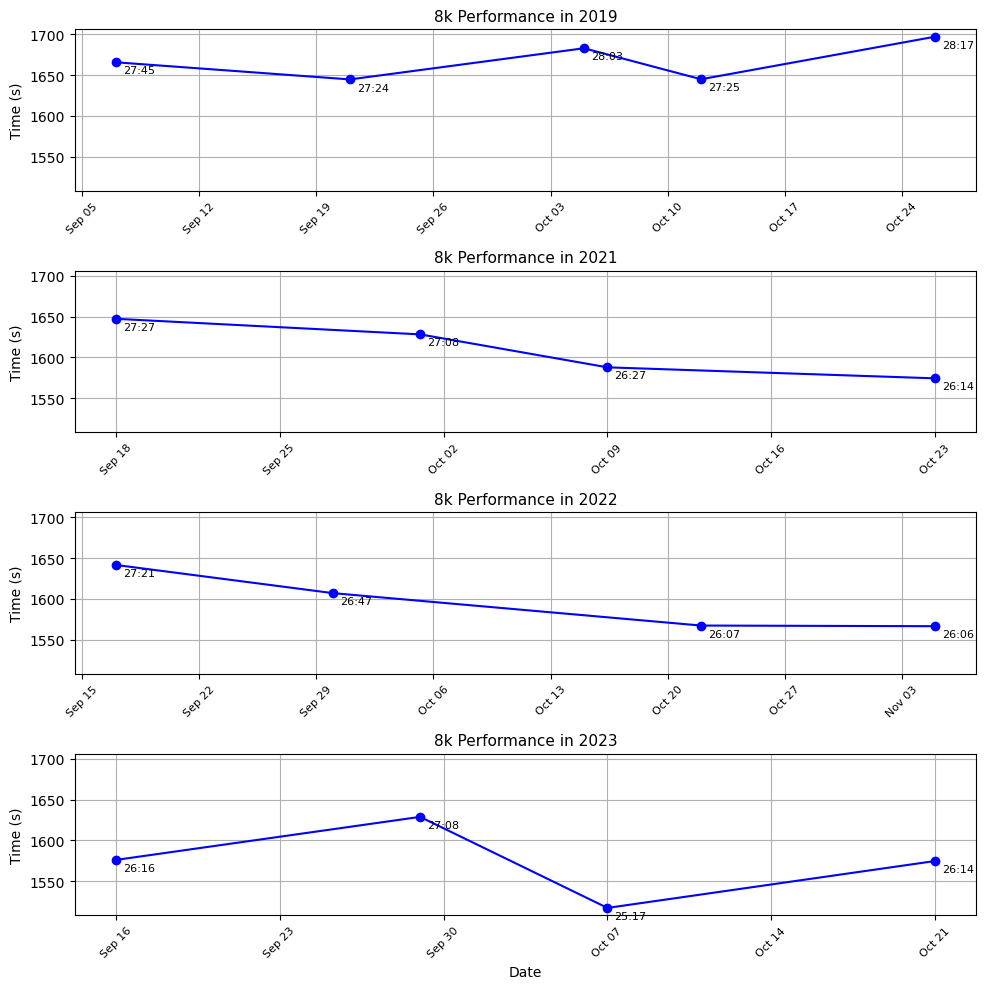

In [77]:
# Ensure datetime and extract year
will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year

# Filter for 8k event
df_8k = will_clayton_data[will_clayton_data['event'] == '8k'].copy()

# Get unique years
years = sorted(df_8k['year'].unique())
num_years = len(years)

# Create compact subplots
fig, axes = plt.subplots(num_years, 1, figsize=(10, 2.5 * num_years), sharey=True)
if num_years == 1:
    axes = [axes]

# Format seconds as mm:ss
def format_mmss(seconds):
    if pd.isna(seconds):
        return ""
    minutes = int(seconds // 60)
    secs = int(seconds % 60)
    return f"{minutes}:{secs:02d}"

for ax, year in zip(axes, years):
    df_year = df_8k[df_8k['year'] == year].sort_values('parsed_date')
    df_year['mmss'] = df_year['granular_performance'].apply(format_mmss)

    # Plot performance over time
    ax.plot(df_year['parsed_date'], df_year['granular_performance'], marker='o', color='blue', label='Performance')
    ax.set_title(f'8k Performance in {year}', fontsize=11)
    ax.set_ylabel('Time (s)', fontsize=10)
    ax.invert_yaxis()
    ax.grid(True)

    # Annotate each point
    for i, row in df_year.iterrows():
        ax.annotate(row['mmss'], (row['parsed_date'], row['granular_performance']),
                    textcoords="offset points", xytext=(5, -8), ha='left', fontsize=8)

    # Format x-axis consistently for each subplot
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # every 7 days
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', labelsize=8, rotation=45)

# Final layout tweaks
axes[-1].set_xlabel('Date', fontsize=10)
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()

### looking at Will Clayton's 3000S times within each season

C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\2276366428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\2276366428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year


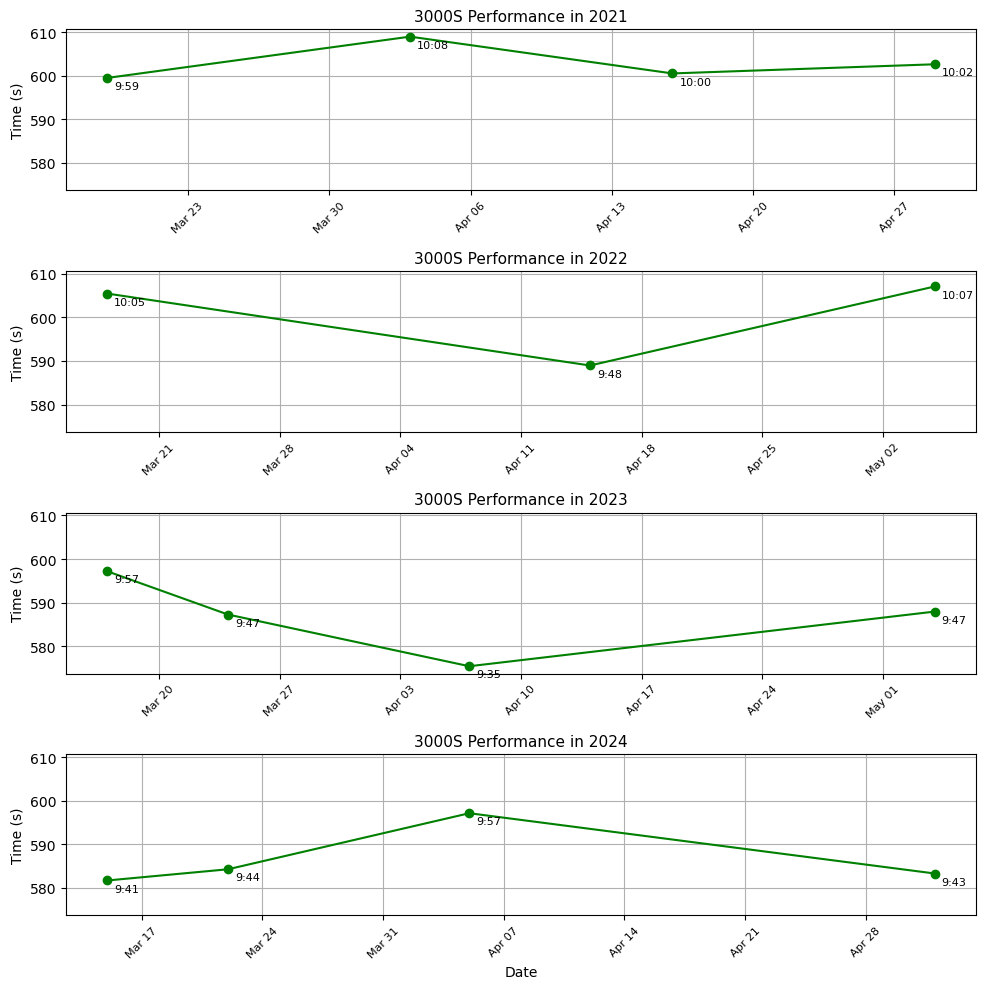

In [78]:
# Ensure datetime and extract year
will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year

# Filter for 3000S event
df_3000S = will_clayton_data[will_clayton_data['event'] == '3000S'].copy()

# Get unique years
years = sorted(df_3000S['year'].unique())
num_years = len(years)

# Create compact subplots
fig, axes = plt.subplots(num_years, 1, figsize=(10, 2.5 * num_years), sharey=True)
if num_years == 1:
    axes = [axes]

# Format seconds as mm:ss
def format_mmss(seconds):
    if pd.isna(seconds):
        return ""
    minutes = int(seconds // 60)
    secs = int(seconds % 60)
    return f"{minutes}:{secs:02d}"

for ax, year in zip(axes, years):
    df_year = df_3000S[df_3000S['year'] == year].sort_values('parsed_date')
    df_year['mmss'] = df_year['granular_performance'].apply(format_mmss)

    # Plot performance over time
    ax.plot(df_year['parsed_date'], df_year['granular_performance'], marker='o', color='green', label='Performance')
    ax.set_title(f'3000S Performance in {year}', fontsize=11)
    ax.set_ylabel('Time (s)', fontsize=10)
    ax.invert_yaxis()
    ax.grid(True)

    # Annotate each point
    for i, row in df_year.iterrows():
        ax.annotate(row['mmss'], (row['parsed_date'], row['granular_performance']),
                    textcoords="offset points", xytext=(5, -8), ha='left', fontsize=8)

    # Format x-axis consistently for each subplot
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # every 7 days
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', labelsize=8, rotation=45)

# Final layout tweaks
axes[-1].set_xlabel('Date', fontsize=10)
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()

### compare Will Clayton's performances across division, conference, and region benchmarks
#### need to join to the leagues dataframe first

In [62]:
# join to the dataframe with the leagues data to get correct league names

leagues_file_path = r"C:\Users\leopo\iCloudDrive\Desktop\Projects\TFRRS Scraper\school_leagues_with_extracted_names.feather"

leagues_data = pd.read_feather(leagues_file_path)


#rename the misspelled column

leagues_data.rename(columns={'divison': 'division'}, inplace=True)

# for the main data
data['school_url_trimmed'] = data['school_scraped_url'].str.split('config').str[0].str.rstrip('/')

data_with_leagues = data.merge(
    leagues_data[['school_url', 'conference1', 'region', 'division']],
    left_on='school_url_trimmed',
    right_on='school_url',
    how='left'
)


#for the will_clayton_data

will_clayton_data['school_url_trimmed'] = will_clayton_data['school_scraped_url'].str.split('config').str[0].str.rstrip('/')

will_with_leagues = will_clayton_data.merge(
    leagues_data[['school_url', 'conference1', 'region', 'division']],
    left_on='school_url_trimmed',
    right_on='school_url',
    how='left'
)



C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\3137039074.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['school_url_trimmed'] = will_clayton_data['school_scraped_url'].str.split('config').str[0].str.rstrip('/')


### view a sample of the merged data

In [63]:
will_with_leagues.head(3)

,athlete_name,last_name,first_name,athlete_id,year_when_scraped,school,school_scraped_url,division_x,region_x,main_conference,other_conferences_found,gender,transfers,has_transferred,meet_name,meet_date,events_competed_in_meet,event,n_event_of_meet,performance,place,event_stage,wind,meet_type,scraped_for_school,athlete_url,year_scraped_roster,year_scraped_season,year_scraped_year,school_roster_size,parsed_date,converted_performance,granular_performance,school_state,year,school_url_trimmed,school_url,conference1,region_y,division_y
0,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,2024 Gulf South Conference Outdoor Championship,"May 2- 4, 2024",2,5000,1,15:42.13,16th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-05-02,0 days 00:15:42.130000,942.13,TN,2024,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,Gulf South,South Region,DII
1,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,2024 Gulf South Conference Outdoor Championship,"May 2- 4, 2024",2,3000S,2,9:43.31,7th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-05-02,0 days 00:09:43.310000,583.31,TN,2024,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,Gulf South,South Region,DII
2,WILL CLAYTON,Clayton,Will,21_.SORB-NAITSIRHC_NOTYALCLLIW,SR-4,CHRISTIAN BROS.,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,DII,South Region,Gulf South,[],M,None,0,Memphis Tiger Invitational,"Apr 26-27, 2024",1,1500,1,4:13.60,15th,F,,tf,CHRISTIAN BROS.,https://www.tfrrs.org/athletes/7379036/Christi...,2020,outdoor,2020,22,2024-04-26,0 days 00:04:13.600000,253.60,TN,2024,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,https://tf.tfrrs.org/teams/tf/TN_college_m_Chr...,Gulf South,South Region,DII


### extract Will Clayton's conference, region, and division

In [81]:
# Extract most frequent values (mode) from key columns
will_clayton_conference = will_with_leagues['conference1'].mode().iloc[0]
will_clayton_region = will_with_leagues['region_y'].mode().iloc[0]
will_clayton_division = will_with_leagues['division_y'].mode().iloc[0]
will_clayton_gender = will_with_leagues['gender'].mode().iloc[0]


print(
    f"Will Clayton's most frequent conference: {will_clayton_conference}\n"
    f"Region: {will_clayton_region}, Division: {will_clayton_division}\n"
    f"Gender: {will_clayton_gender}"
)

Will Clayton's most frequent conference: Gulf South
Region: South Region, Division: DII
Gender: M


### filter dataframe to only Will Clayton's conference and gender

In [83]:
will_clayton_conference_data = data_with_leagues[(data_with_leagues['conference1']== will_clayton_conference) &
                                                 (data_with_leagues['gender'] == will_clayton_gender)]

will_clayton_conference_data.head(3)

,athlete_name,last_name,first_name,athlete_id,year_when_scraped,school,school_scraped_url,division_x,region_x,main_conference,other_conferences_found,gender,transfers,has_transferred,meet_name,meet_date,events_competed_in_meet,event,n_event_of_meet,performance,place,event_stage,wind,meet_type,scraped_for_school,athlete_url,year_scraped_roster,year_scraped_season,year_scraped_year,school_roster_size,parsed_date,converted_performance,granular_performance,school_state,school_url_trimmed,school_url,conference1,region_y,division_y
1868534,TALON BULLOCK,Bullock,Talon,31_ENERAZAN-ACCEVERT_KCOLLUBNOLAT,FR-1,TREVECCA NAZARENE,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,DII,South Region,Gulf South,[],M,None,0,2015 Billy Hayes Invitational,"May 2, 2015",1,LJ,1,FOUL,,None,,tf,TREVECCA NAZARENE,https://www.tfrrs.org/athletes/5142113/Trevecc...,2015,outdoor,2015,14,2015-05-02,NaT,NaN,TN,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,Gulf South,South Region,DII
1868535,TALON BULLOCK,Bullock,Talon,31_ENERAZAN-ACCEVERT_KCOLLUBNOLAT,FR-1,TREVECCA NAZARENE,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,DII,South Region,Gulf South,[],M,None,0,2015 G-MAC Outdoor Track & Field Championships,"Apr 18, 2015",4,LJ,1,FOUL,,None,,tf,TREVECCA NAZARENE,https://www.tfrrs.org/athletes/5142113/Trevecc...,2015,outdoor,2015,14,2015-04-18,NaT,NaN,TN,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,Gulf South,South Region,DII
1868536,TALON BULLOCK,Bullock,Talon,31_ENERAZAN-ACCEVERT_KCOLLUBNOLAT,FR-1,TREVECCA NAZARENE,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,DII,South Region,Gulf South,[],M,None,0,2015 G-MAC Outdoor Track & Field Championships,"Apr 18, 2015",4,TJ,2,FOUL,,None,,tf,TREVECCA NAZARENE,https://www.tfrrs.org/athletes/5142113/Trevecc...,2015,outdoor,2015,14,2015-04-18,NaT,NaN,TN,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,https://tf.tfrrs.org/teams/tf/TN_college_m_Tre...,Gulf South,South Region,DII


### visualize Will Clayton's average 3000s and 8k season performance against conference averages

C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\4238071420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\4238071420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year
C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\4238071420.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

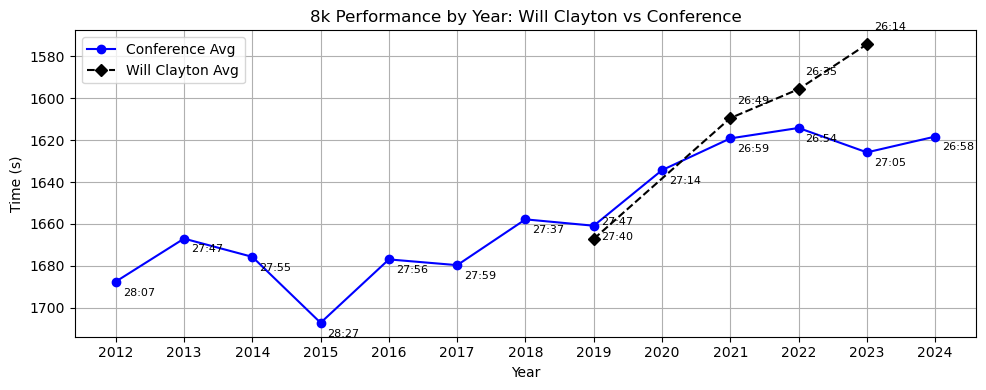

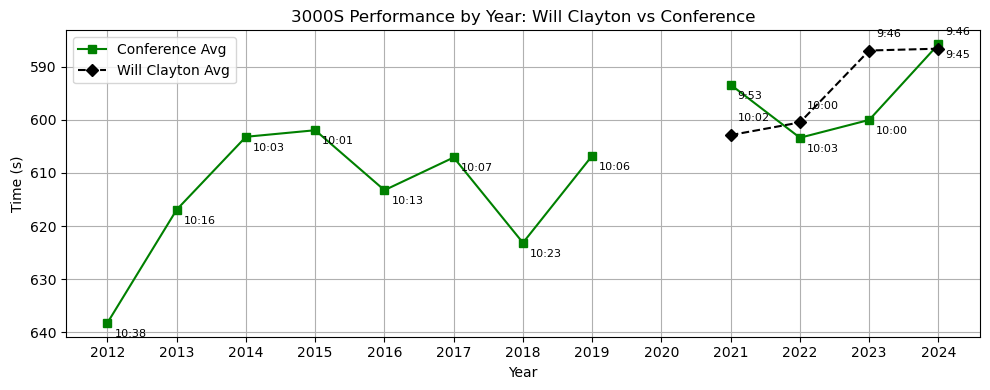

In [88]:
# Ensure datetime and extract year
will_clayton_data['parsed_date'] = pd.to_datetime(will_clayton_data['parsed_date'])
will_clayton_data['year'] = will_clayton_data['parsed_date'].dt.year
will_clayton_conference_data['parsed_date'] = pd.to_datetime(will_clayton_conference_data['parsed_date'])
will_clayton_conference_data['year'] = will_clayton_conference_data['parsed_date'].dt.year

# Format seconds as mm:ss
def format_mmss(seconds):
    if pd.isna(seconds):
        return ""
    minutes = int(seconds // 60)
    secs = int(seconds % 60)
    return f"{minutes}:{secs:02d}"

# --- 8k Plot ---
conf_8k = will_clayton_conference_data[will_clayton_conference_data['event'] == '8k']
clayton_8k = will_clayton_data[will_clayton_data['event'] == '8k']

avg_conf_8k = conf_8k.groupby('year')['granular_performance'].mean()
avg_clayton_8k = clayton_8k.groupby('year')['granular_performance'].mean()

plt.figure(figsize=(10, 4))
plt.plot(avg_conf_8k.index, avg_conf_8k.values, marker='o', color='blue', label='Conference Avg')
plt.plot(avg_clayton_8k.index, avg_clayton_8k.values, marker='D', color='black', linestyle='--', label='Will Clayton Avg')

plt.title('8k Performance by Year: Will Clayton vs Conference')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(sorted(set(avg_conf_8k.index).union(avg_clayton_8k.index)))

# Annotate both lines
for year, value in avg_conf_8k.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(5, -10), ha='left', fontsize=8)
for year, value in avg_clayton_8k.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(5, 10), ha='left', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

# --- 3000S Plot ---
conf_3000S = will_clayton_conference_data[will_clayton_conference_data['event'] == '3000S']
clayton_3000S = will_clayton_data[will_clayton_data['event'] == '3000S']  # capital S

avg_conf_3000S = conf_3000S.groupby('year')['granular_performance'].mean()
avg_clayton_3000S = clayton_3000S.groupby('year')['granular_performance'].mean()

plt.figure(figsize=(10, 4))
plt.plot(avg_conf_3000S.index, avg_conf_3000S.values, marker='s', color='green', label='Conference Avg')
plt.plot(avg_clayton_3000S.index, avg_clayton_3000S.values, marker='D', color='black', linestyle='--', label='Will Clayton Avg')

plt.title('3000S Performance by Year: Will Clayton vs Conference')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(sorted(set(avg_conf_3000S.index).union(avg_clayton_3000S.index)))

# Annotate both lines
for year, value in avg_conf_3000S.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(5, -10), ha='left', fontsize=8)
for year, value in avg_clayton_3000S.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(5, 10), ha='left', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

### visualize Will Clayton's average 3000s and 8k season performance against conference and division averages

C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\3787499023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event'] = df['event'].str.replace('3000s', '3000S', case=False)
C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\3787499023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_date'] = pd.to_datetime(df['parsed_date'])
C:\Users\leopo\AppData\Local\Temp\ipykernel_22748\3787499023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

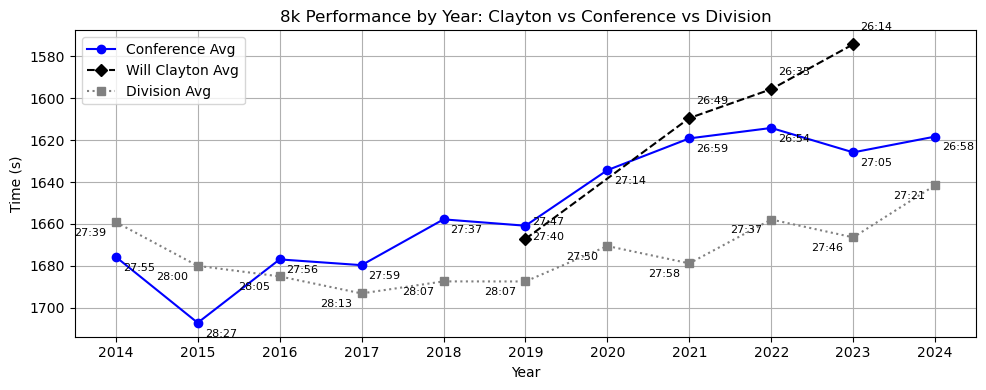

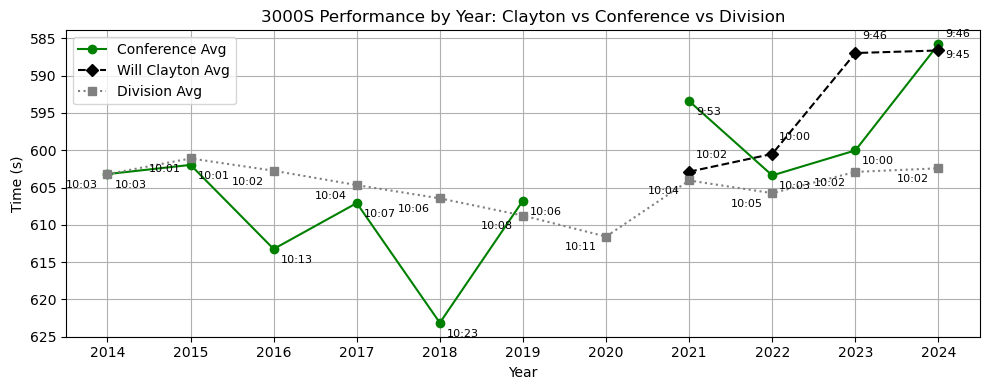

In [93]:
# --- Normalize event names ---
for df in [will_clayton_data, will_clayton_conference_data, data_with_leagues]:
    df['event'] = df['event'].str.replace('3000s', '3000S', case=False)

# --- Ensure datetime and extract year ---
for df in [will_clayton_data, will_clayton_conference_data, data_with_leagues]:
    df['parsed_date'] = pd.to_datetime(df['parsed_date'])
    df['year'] = df['parsed_date'].dt.year

# --- Format seconds as mm:ss ---
def format_mmss(seconds):
    if pd.isna(seconds):
        return ""
    minutes = int(seconds // 60)
    secs = int(seconds % 60)
    return f"{minutes}:{secs:02d}"

# --- 8k Plot ---
conf_8k = will_clayton_conference_data[will_clayton_conference_data['event'] == '8k']
clayton_8k = will_clayton_data[will_clayton_data['event'] == '8k']
div_8k = data_with_leagues[
    (data_with_leagues['event'] == '8k') &
    (data_with_leagues['gender'] == will_clayton_gender) &
    (data_with_leagues['division_y'] == will_clayton_division)
]

avg_conf_8k = conf_8k.groupby('year')['granular_performance'].mean()
avg_clayton_8k = clayton_8k.groupby('year')['granular_performance'].mean()
avg_div_8k = div_8k.groupby('year')['granular_performance'].mean()

# Filter to only include years from 2014 onward
avg_conf_8k = avg_conf_8k[avg_conf_8k.index >= 2014]
avg_clayton_8k = avg_clayton_8k[avg_clayton_8k.index >= 2014]
avg_div_8k = avg_div_8k[avg_div_8k.index >= 2014]

plt.figure(figsize=(10, 4))
plt.plot(avg_conf_8k.index, avg_conf_8k.values, marker='o', color='blue', label='Conference Avg')
plt.plot(avg_clayton_8k.index, avg_clayton_8k.values, marker='D', color='black', linestyle='--', label='Will Clayton Avg')
plt.plot(avg_div_8k.index, avg_div_8k.values, marker='s', color='gray', linestyle=':', label='Division Avg')

plt.title('8k Performance by Year: Clayton vs Conference vs Division')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(sorted(set(avg_conf_8k.index).union(avg_clayton_8k.index).union(avg_div_8k.index)))

# Annotate each line
for year, value in avg_clayton_8k.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(5, 10), ha='left', fontsize=8)
for year, value in avg_conf_8k.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(5, -10), ha='left', fontsize=8)
for year, value in avg_div_8k.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(-30, -10), ha='left', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

# --- 3000S Plot ---
conf_3000S = will_clayton_conference_data[will_clayton_conference_data['event'] == '3000S']
clayton_3000S = will_clayton_data[will_clayton_data['event'] == '3000S']
div_3000S = data_with_leagues[
    (data_with_leagues['event'] == '3000S') &
    (data_with_leagues['gender'] == will_clayton_gender) &
    (data_with_leagues['division_y'] == will_clayton_division)
]

avg_conf_3000S = conf_3000S.groupby('year')['granular_performance'].mean()
avg_clayton_3000S = clayton_3000S.groupby('year')['granular_performance'].mean()
avg_div_3000S = div_3000S.groupby('year')['granular_performance'].mean()

# Filter to only include years from 2014 onward
avg_conf_3000S = avg_conf_3000S[avg_conf_3000S.index >= 2014]
avg_clayton_3000S = avg_clayton_3000S[avg_clayton_3000S.index >= 2014]
avg_div_3000S = avg_div_3000S[avg_div_3000S.index >= 2014]

plt.figure(figsize=(10, 4))
plt.plot(avg_conf_3000S.index, avg_conf_3000S.values, marker='o', color='green', label='Conference Avg')
plt.plot(avg_clayton_3000S.index, avg_clayton_3000S.values, marker='D', color='black', linestyle='--', label='Will Clayton Avg')
plt.plot(avg_div_3000S.index, avg_div_3000S.values, marker='s', color='gray', linestyle=':', label='Division Avg')

plt.title('3000S Performance by Year: Clayton vs Conference vs Division')
plt.xlabel('Year')
plt.ylabel('Time (s)')
plt.grid(True)
plt.gca().invert_yaxis()
plt.xticks(sorted(set(avg_conf_3000S.index).union(avg_clayton_3000S.index).union(avg_div_3000S.index)))

# Annotate each line
for year, value in avg_clayton_3000S.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(5, 10), ha='left', fontsize=8)
for year, value in avg_conf_3000S.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(5, -10), ha='left', fontsize=8)
for year, value in avg_div_3000S.items():
    plt.annotate(format_mmss(value), (year, value), textcoords="offset points", xytext=(-30, -10), ha='left', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()